# 6.6 Sourcing & Analyzing Time-Series Data

This script contains the following:
1. Importing your libraries and data
2. Subsetting, wrangling, and cleaning time-series data
3. Time series analysis: decomposition
4. Testing for stationarity
5. Stationarizing the Federal Reserve Economic Data

## 1. Importing your libraries and data

In [5]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [6]:
# Configure API key 

quandl.ApiConfig.api_key = 'JuUK6fEzdfGg-SUNP_KA'

In [7]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [8]:
# Identifying pathway for import for ease with multiple imports
path = r'C:\Users\Chris Arnold\Documents\Citibike Analysis'

In [9]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'citibike_time_series_by_day.csv'), index_col = False)

In [10]:
df.head(5)

,date,Sum of trip_duration
0,2022-09-01,1198543
1,2022-09-02,942649
2,2022-09-03,1242062
3,2022-09-04,1503259
4,2022-09-05,1351751


In [11]:
pd.to_datetime(df['date'])

0    2022-09-01
1    2022-09-02
2    2022-09-03
3    2022-09-04
4    2022-09-05
5    2022-09-06
6    2022-09-07
7    2022-09-08
8    2022-09-09
9    2022-09-10
10   2022-09-11
11   2022-09-12
12   2022-09-13
13   2022-09-14
14   2022-09-15
15   2022-09-16
16   2022-09-17
17   2022-09-18
18   2022-09-19
19   2022-09-20
20   2022-09-21
21   2022-09-22
22   2022-09-23
23   2022-09-24
24   2022-09-25
25   2022-09-26
26   2022-09-27
27   2022-09-28
28   2022-09-29
29   2022-09-30
Name: date, dtype: datetime64[ns]

In [12]:
df.shape

(30, 2)

In [13]:
df.columns

Index(['date', 'Sum of trip_duration'], dtype='object')

In [14]:
df = df.set_index('date')

In [15]:
df.index

Index(['2022-09-01', '2022-09-02', '2022-09-03', '2022-09-04', '2022-09-05',
       '2022-09-06', '2022-09-07', '2022-09-08', '2022-09-09', '2022-09-10',
       '2022-09-11', '2022-09-12', '2022-09-13', '2022-09-14', '2022-09-15',
       '2022-09-16', '2022-09-17', '2022-09-18', '2022-09-19', '2022-09-20',
       '2022-09-21', '2022-09-22', '2022-09-23', '2022-09-24', '2022-09-25',
       '2022-09-26', '2022-09-27', '2022-09-28', '2022-09-29', '2022-09-30'],
      dtype='object', name='date')

In [16]:
df.head(5)

,Sum of trip_duration
date,
2022-09-01,1198543
2022-09-02,942649
2022-09-03,1242062
2022-09-04,1503259
2022-09-05,1351751


In [17]:
df.columns

Index(['Sum of trip_duration'], dtype='object')

In [18]:
df.dtypes

Sum of trip_duration    int64
dtype: object

In [19]:
type(df)

pandas.core.frame.DataFrame

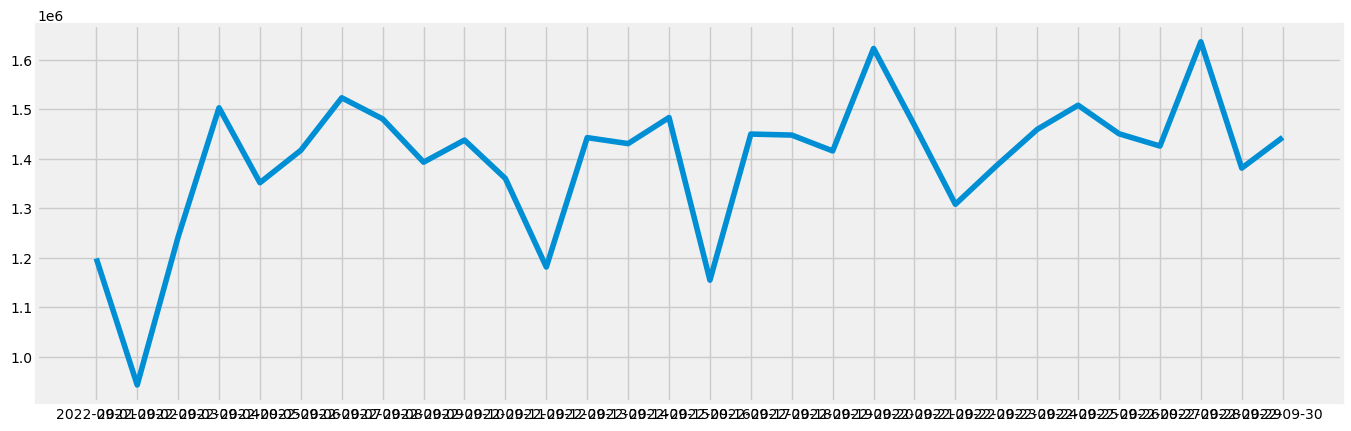

In [20]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(df)

## 2. Subsetting, wrangling, and cleaning time-series data

In [21]:
df2 = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'citibike_time_series_by_day.csv'), index_col = False)

In [22]:
df2.head()

,date,Sum of trip_duration
0,2022-09-01,1198543
1,2022-09-02,942649
2,2022-09-03,1242062
3,2022-09-04,1503259
4,2022-09-05,1351751


In [23]:
df.shape

(30, 1)

In [24]:
# Check for missing values (you shouldn't have any)

df.isnull().sum() 

Sum of trip_duration    0
dtype: int64

In [25]:
# Check for duplicates

dups = df.duplicated()
dups.sum()

# No dups!

0

Duplicates are ok in this situation because it is rental duration!

In [26]:
# Reset index so that you can use the "Date" column as a filter

df.reset_index(inplace=True)

In [27]:
# Set the "Date" column as the index

from datetime import datetime

df2['datetime'] = pd.to_datetime(df2['date']) # Create a datetime column from "Date.""
df2 = df2.set_index('datetime') # Set the datetime as the index of the dataframe.
df2.drop(['date'], axis=1, inplace=True) # Drop the "Date" column.
df2.head()

,Sum of trip_duration
datetime,
2022-09-01,1198543
2022-09-02,942649
2022-09-03,1242062
2022-09-04,1503259
2022-09-05,1351751


## 3. Time-series analysis: decomposition

In [28]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(df2, model='additive')

In [29]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

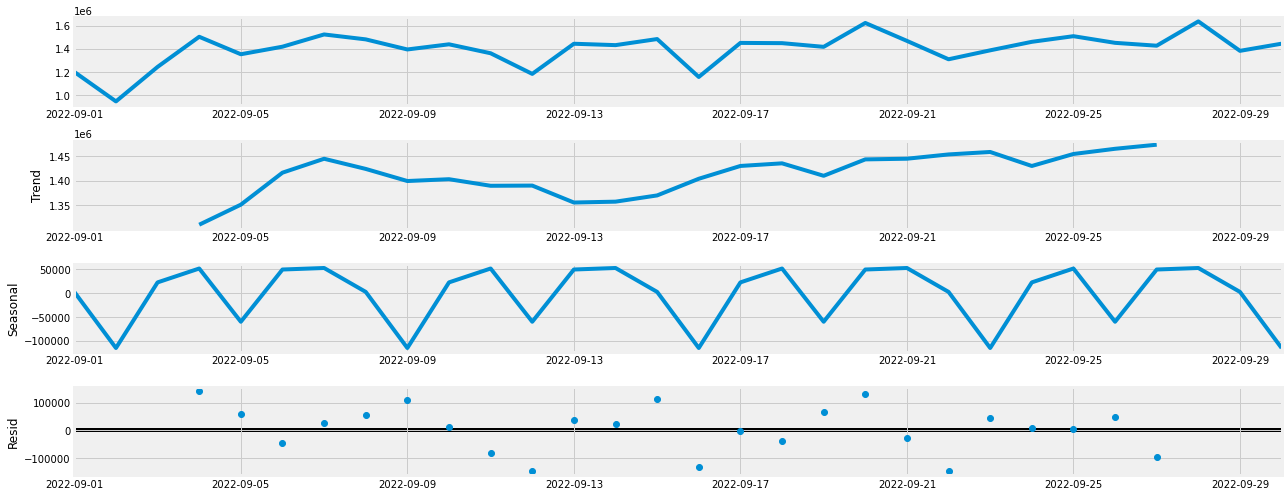

In [30]:
# Plot the separate components

decomposition.plot()
plt.show()

Level: This is the total amount of additive time that the bikes are used per day during the month of september in New York City. There appears to be an ever so slight trend in the upper direction from the beginning of the month to the end of the month, however for the most part I would say that the rental time does fluctuate daily but stays pretty stable.
Underlying Trend: We are not smoothed out data her ebcause there is only one data point per day for just one month. There is an increasing trend from the beginning of the month to the end of the month.
Seasonality: There is definitely a weekly trend that repeats itself every 7 days. It is almost identical for every day of the week. This will be useful for the analysis presentation in the next section.
Residual: The behavior is constantly up and down day to day so there is a bit of noise left over. This is to be expected from the behavior of the data though.

## 4. Testing for stationarity

In [33]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df2['Sum of trip_duration'])

Dickey-Fuller Stationarity test:
Test Statistic                 -4.105293
p-value                         0.000949
Number of Lags Used             0.000000
Number of Observations Used    29.000000
Critical Value (1%)            -3.679060
Critical Value (5%)            -2.967882
Critical Value (10%)           -2.623158
dtype: float64


The test statistic is smaller than the critical value 5% thus we can reject the null hypothesis. This means that there is no unit root in our data. Also this means that there is no need to perform any differencing steps. 

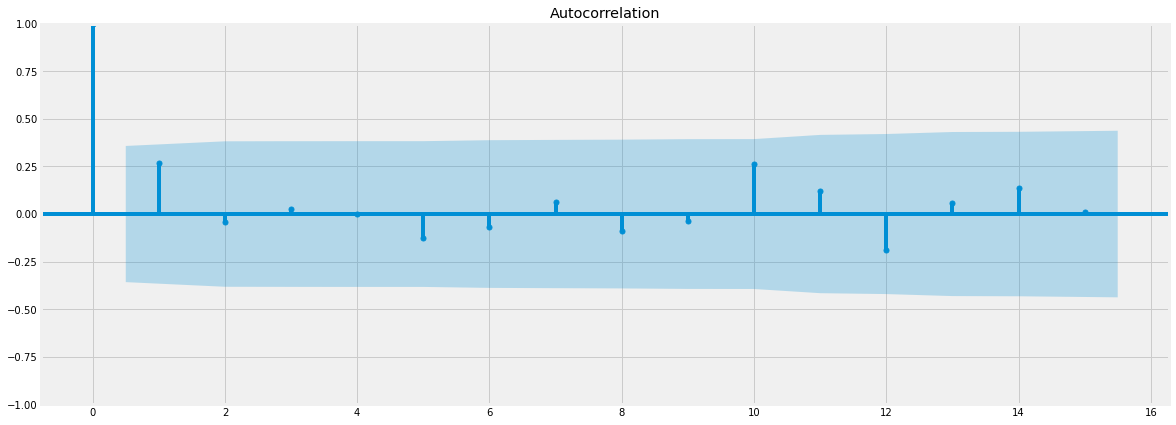

In [34]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(df2)
plt.show()

We have only one lag that shows significan correlation. We can be sure that the data is stationary.